In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
 
# load the dataset
def load_dataset(filename, numbases):
	# load the dataset as a pandas DataFrame
	data = pd.read_csv(filename)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, 1+numbases:81]
	y = dataset[:, 81]
	# format all fields as string
	X = X.astype(str)
	# reshape target to be a 2d array
	y = y.reshape((len(y), 1))
	return X, y
 
# load the dataset
X, y = load_dataset('test_gcmatch3.csv', 0)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

FileNotFoundError: ignored

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

def prepare_inputs(X_train, X_test):
	ohe = OneHotEncoder()
	ohe.fit(X_train)
	X_train_enc = ohe.transform(X_train)
	X_test_enc = ohe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)


c:\Users\shssm\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\shssm\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

model = svm.SVC()
model.fit(X_train_enc, y_train_enc)
y_pred = model.predict(X_test_enc)
print(accuracy_score(y_test_enc, y_pred))


0.5742397137745975


In [ ]:
accs = []
for num in range(0,75):
    X, y = load_dataset('finaldataframe.csv', num)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
    X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
    y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
    model = svm.SVC()
    model.fit(X_train_enc, y_train_enc)
    y_pred = model.predict(X_test_enc)
    accs.append(accuracy_score(y_test_enc, y_pred))

c:\Users\shssm\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\shssm\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\shssm\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\shssm\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

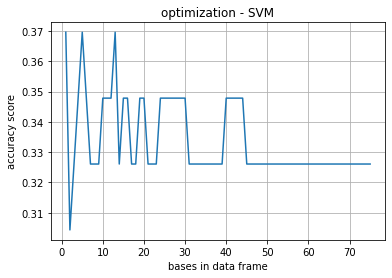

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = accs
s = [75 - n for n in range(0,75)]

fig, ax = plt.subplots()
ax.plot(s, t)

ax.set(xlabel='bases in data frame', ylabel='accuracy score',
       title='optimization - SVM')
ax.grid()

fig.savefig("test.png")
plt.show()